<img style="float:right;width:100px" src="https://enib.fr/images/logo-enib-accueil.jpg">
<div><h3>Labo de méthodes numériques S5, automne 2020</h3>
       <p><em>Nom Prénom</em></p>
</div>
<div style="text-align:center;padding-bottom:20px;padding-top:10px">
    <h1> TP 1 : introduction à la résolution d'équations et systèmes différentiels </h1>
</div>
    

In [1]:
#Evite d'utiliser show :
%matplotlib inline 
#les bons modules :
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

# Exercice 1 : résolution d'une équation différentielle

On souhaite résoudre le problème de Cauchy 
\begin{equation}
\left|
\begin{array}{l}
u'(t)=3u(t)-3t\\
u(0)=\alpha
\end{array}
\right.
\qquad (1)
\end{equation}

### Question 1 

Donner la solution exacte de ce problème, après en avoir montré l'unicité.


Unicité : On a $f(t,u(t))=3u(t)-3t$ donc $f(t,y)=3y-3t$ donc $\frac{\partial f}{\partial y}(t,y)=3$

3 est continu et borné donc nous avons bien une équation lipschitzienne prouvant l'unicité du problème de Cauchy.

SSM : $\lambda e^{3t}, \lambda \in \mathbb{R}$.

SP : On observe que le second membre est de la forme : $\textbf{at + b}$. Alors $y_{0}$ est de cette forme.

On remplace dans (1) : $a - 3at -3b = -3t$. 

On identifie : 
\begin{equation}
\left|
\begin{array}{l}
-3a = -3\\
a-3b = 0
\end{array}
\right.
\end{equation}

\begin{equation}
\left|
\begin{array}{l}
a = 1\\
b=1/3
\end{array}
\right.
\end{equation}

Donc $Sp = t + 1/3$.

De plus, on a $y(0) = \alpha$ alors $\lambda e^{3*0} + 0 + 1/3 = \alpha \Rightarrow \lambda = \alpha - 1/3$

$SG : y(t) = SSM + SP \Rightarrow (\alpha - 1/3)e^{3t} + t + 1/3$

### Question 2

On suppose $\alpha=1/3$. Calculer $z(10)$, où $z$ est la solution exacte du problème. 

On a $\alpha = 1/3$, et $y(t) = (\alpha - 1/3)e^{3t} + t + 1/3$.

Donc $y(10) =  (\alpha -\frac{1}{3})e^{3*10} + 10 + 1/3 = 31/3$

### Question 3

Utiliser la commande "integrate.odeint", pour vérifier le résultat de la question 2, et tracer la courbe (approchée numériquement) $\{(t,z(t)),~t\in[0,5]\}$ : on tracera la courbe pour  $h=0.01$.

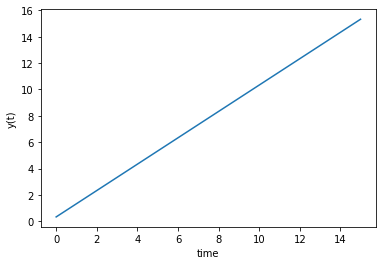

[10.33333333]


In [2]:
def model(y, t):
    dydt = 3*y - 3*t
    return dydt

y0 = 1/3

#t = np.linspace(0,10)
#t = [0,10]
h = 0.01
t = np.arange(0,15,h)

y = odeint(model,y0,t)

plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show() # correspond bien puisque nous voulions une droite y = t + 1/3

print(y[int(10/h)])

On observe que le résultat de la 2ème et 3ème question correspondent.

### Question 4

On suppose maintenant $\alpha=0.3333333$. Utiliser à nouveau la commande "integrate.odeint" pour tracer la solution approchée. Qu'observez-vous ? Est-ce un problème d'imprécision numérique de la commande $\texttt{numpy}$ utilisée ?

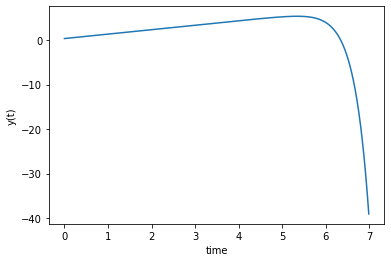

In [3]:
t=np.arange(0,7,0.01)
y = odeint(model,0.3333333,t)

plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

On observe un changement important de comportement sur le tracé de la courbe, ceci dû au manque de précision provenant de l'irrationnel. Si $\alpha$ n'est pas exactement égal à 1/3, l'exponentielle va influer tout de suite (ici $\alpha$ est légèrement inférieur à 1/3 donc l'exponentielle est négative).

### Question 5

Tracer les champs de vecteurs associés au problème (1).

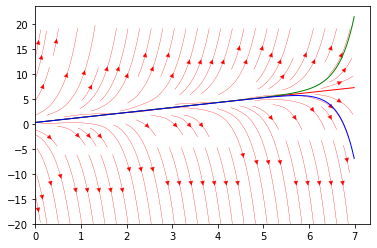

In [4]:
def exacte(t,a):
    s=(a-1/3)*exp(3*t)+t+1/3
    return s

nQuiv=20
tt, yy = np.meshgrid(np.linspace(0,7,nQuiv),
                    np.linspace(-20,20,nQuiv))
#meshgrid : construit le maillage
#tt=la matrice des abscisses du maillage
#yy=idem avec les ordonnées
Vt = np.ones(tt.shape)
#une matrice 20x20 avec que des 1
Vy = model(yy,tt)
#en gros on fait une double boucle pour appliquer f en chaque point du maillage
Vt=Vt/np.sqrt(Vt**2+Vy**2)
Vy=Vy/np.sqrt(Vt**2+Vy**2)
#ici on a normé chaque composante des deux matrices
plt.streamplot(tt, yy, Vt, Vy, color='r', linewidth=.3)
#plt.quiver(tt,yy,Vt,Vy, color='k')
#plt.plot(t2,exacte(t2),label="h=0.2",color="k",linewidth=2)
plt.plot(t,odeint(model,1/3,t),label="h=0.2",color="red",linewidth=1)
plt.plot(t,odeint(model,1/3+0.00000001,t),label="h=0.2",color="green",linewidth=1)
plt.plot(t,odeint(model,1/3-0.00000001,t),label="h=0.2",color="blue",linewidth=1)
#plt.plot(t,odeint(f,-1,t),label="h=0.2",color="orange",linewidth=1)

# Exercice 2 : résolution d'un système différentiel 

En 1925 et 1926, Alfred James Lotca et Vito Volterra ont, indépendamment l'un de l'autre, proposé un modèle d'équations décrivant les évolutions conjointes d'une population de proies (initialement des lièvres) et de celle de leurs prédateurs (initialement des proies). Ces équations s'écrivent 
$$
\left\{
\begin{array}{rcl}
x'(t)&=&x(t)(\alpha-\beta y(t))\\
y'(t)&=&-y(t)(\delta-\gamma x(t))
\end{array}
\right.
$$
où $x(t)$ est l'effectif des proies au temps $t$, et $y(t)$ celui des prédateurs. 
### Question 1 

Expliquez en commentaire à quels phénomènes naturels correspondent selon vous les paramètres $\alpha,\beta,\gamma,\delta$.


$\alpha$ taux d'accroissement naturel (en l'absence de prédateur).

$\delta$ taux de mortalité naturel (en l'absence de proie).

$\beta$ influence des prédateurs sur le taux de croissance des proies. (plus il y a de prédateurs moins il y a de proies)

$\gamma$ influence des proies sur le taux de croissance des prédateurs. (plus il y a de proies plus il y a de prédateurs)



 On pose à présent tous les paramètres ci-dessus égaux à 1. On initialise également les populations à $1/2$ (il s'agit plus donc ici d'une proportion de chaque espèce dans la population totale).

### Question 2

Définir la fonction associée à la résolution du système différentiel.


Conditions Initiales :
$$
\left\{
\begin{array}{rcl}
x(0) = 1/2\\
y(0) = 1/2
\end{array}
\right.
$$

In [5]:
def F(u,t):
    alpha, beta, delta, gamma = 1, 1, 1, 1
    x, y = u[0], u[1]
    return np.array([x*(alpha - beta*y), -y*(delta - gamma*x)])

### Question 3

Tracer les champs de vecteurs-vitesses sur le maillage $[0,4]\times[0,4]$ avec un pas de $0.2$.

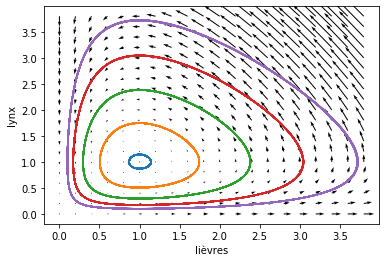

In [6]:
xx = np.arange(0,4,.2)
#discrétisation de l'axe des x
yy = np.arange(0,4,.2)
#idem y
X,Y = np.meshgrid(xx,yy) 
#X matrice des abscisses des pts du maillage
#Y matrice des ordonnéees des pts du maillage

t = np.linspace(0,100,1000)
dX,dY= F([X,Y],t)
#dX matrice des abscisses des vecteurs vitesses
#dY matrice des ordonnées des vecteurs vitesses
norm = np.sqrt(dX*dX+dY*dY)
norm[norm==0] = 1
#dX /= norm
#dY /= norm
plt.quiver(xx, yy, dX, dY, color='k')
plt.xlabel("lièvres")
plt.ylabel("lynx")
# on montre plusieurs solutions en faisant varier les CI (valeurs choisies pour tenir sur [0,4]x[0,4])
CIs = np.linspace(1.1, 2.7, 5)
for y0 in CIs:
    Y = odeint(F, [y0, y0], t)
    plt.plot(Y[:, 0], Y[:, 1])

### Question 4 

Appliquer la méthode "integrate.odeint" sur l'intervalle de temps $[0,100]$, avec un pas de $0.01$, puis afficher, sur le même graphique que le champ de vecteurs, et en rouge, la courbe estimée de $(x(t),y(t)),~t\in[0,100]$.

[[0.5        0.5       ]
 [0.50251253 0.49751247]
 [0.50505018 0.49504983]
 ...
 [0.4127939  0.63575882]
 [0.41430792 0.63204132]
 [0.41584288 0.62835513]]
(10000, 2)


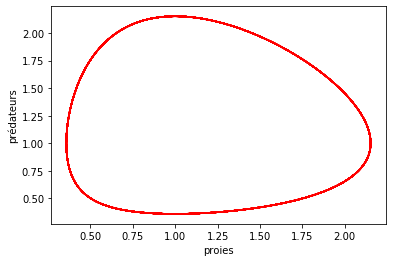

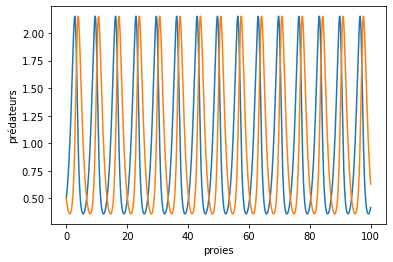

In [7]:
h = 0.01

t = np.arange(0,100,h)

Z0 = [1/2, 1/2]

y = odeint(F,Z0,t) # matrice
print(y)

print(np.shape(y)) # (lignes , colonnes)

# on trace la courbe approchée de (x(t), y(t)) : (proies, prédateurs)
plt.plot(y[:,0], y[:,1], color = "red")
plt.xlabel('proies')
plt.ylabel('prédateurs')
plt.show()

plt.plot(t, y)
plt.xlabel('proies')
plt.ylabel('prédateurs')
plt.show()

## Question 5 

Faire varier les paramètres $\alpha, \beta,\gamma,\delta$ au moyen de la commande "interact", dont un exemple d'utilisation est donné ci-dessous :

In [8]:
p=1
def fun(u,t):
    z=-p*u
    return z

y0=10
x=np.arange(0,5,0.001)

def show(l):
    p=l
    y = odeint(fun,y0,x)
    #y = np.array(y).flatten()
    plt.plot(x,y,label="courbe 1",color="orange")
    plt.xlabel("t")
    plt.ylabel("y")
    plt.legend()
    
interact(show,l=-1)


interactive(children=(IntSlider(value=-1, description='l', max=1, min=-3), Output()), _dom_classes=('widget-in…

<function __main__.show(l)>

# Exercice 3 : résolution d'une équation d'ordre > 1

On considère ici l'équation

\begin{equation}
\left\{
\begin{array}{l}
y^{(3)}(t)+2y''(t)+9y'(t)+18y(t)=0\\
y(0)=0,~y'(0)=1,~y''(0)=-1
\end{array}
\right.
\qquad (2)
\end{equation}

### Question 1 

Ramener cette équation à un problème de Cauchy, en écrivant le code de la fonction associée.

On a une équation d'ordre 3 donc on introduit un vecteur de fonction à 3 composantes : $y, y', y''$

Afin de ramener cette équation au problème de Cauchy, on pose : 

\begin{equation}
CI : Z0 = 
\left(
\begin{array}{l}
0\\
1\\
-1
\end{array}
\right)
\end{equation}
 
\begin{equation}
Z(t) =
\left(
\begin{array}{l}
y(t)\\
y'(t)\\
y''(t)
\end{array}
\right)
=
\left(
\begin{array}{l}
z0(t)\\
z1(t)\\
z2(t)
\end{array}
\right)
\end{equation}

\begin{equation}
Z'(t) =
\left(
\begin{array}{l}
y'(t)\\
y''(t)\\
y'''(t)
\end{array}
\right)
=
\left(
\begin{array}{l}
z1(t)\\
z2(t)\\
-2z2(t) -9z1(t) -18z0(t)
\end{array}
\right)
\end{equation}


### Question 2

Utiliser la commande "integrate.odeint" pour tracer le graphe $(z(t),z'(t))$ (où $z$ est la solution exacte), avec $t\in[0;10]$ et un pas fixe $h=0.001$.

[[ 0.00000000e+00  1.00000000e+00 -1.00000000e+00]
 [ 9.99497886e-04  9.98996502e-01 -1.00699748e+00]
 [ 1.99798890e-03  9.97986008e-01 -1.01398989e+00]
 ...
 [-2.67874923e-01  3.51309163e-01  2.41087430e+00]
 [-2.67522409e-01  3.53718453e-01  2.40770167e+00]
 [-2.67167487e-01  3.56124559e-01  2.40450738e+00]]


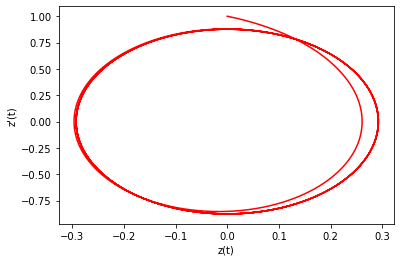

In [9]:
def F_3(u,t):
    z0, z1, z2 = u[0], u[1], u[2]
    return np.array([z1, z2, -2*z2 -9*z1 -18*z0])

h = 0.001

t = np.arange(0,10,h)

Z0 = [0, 1, -1]

y = odeint(F_3,Z0,t) # matrice
print(y)

# on trace la courbe approchée de (z(t), z'(t))
plt.plot(y[:,0], y[:,1], color = "red")
plt.xlabel("z(t)")
plt.ylabel("z'(t)")
plt.show()

### Question 3

Donner la valeur approchée $(z(5.3),z''(5.3))$.

In [11]:
print("z(5.3) = " + str(y[int(5.3/h),0]))
print("z''(5.3) = " + str(y[int(5.3/h),2]))

z(5.3) = -0.12934280364881215
z''(5.3) = 1.164060316829982
